In [1]:
import os
import sys
import requests
client_id = "cbxhzui4en"
client_secret = "m7YcN6l15L4l4hSgVRTfAiArIHbEK8S384Q55fIX"
url = "https://naveropenapi.apigw.ntruss.com/vision-obj/v1/detect"
files = {'image': open('1.jpeg', 'rb')}
headers = {'X-NCP-APIGW-API-KEY-ID': client_id, 'X-NCP-APIGW-API-KEY': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"predictions": [{"num_detections": 20, "detection_classes": [1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0, 1.0, 7.0, 1.0, 7.0, 1.0, 1.0, 1.0, 6.0, 1.0], "detection_names": ["person", "person", "person", "train", "person", "person", "person", "person", "person", "bus", "person", "person", "train", "person", "train", "person", "person", "person", "bus", "person"], "detection_scores": [0.954405, 0.891028, 0.774044, 0.760165, 0.743373, 0.606756, 0.585591, 0.52277, 0.490068, 0.47627, 0.468264, 0.456765, 0.439418, 0.43043, 0.424772, 0.414923, 0.40313, 0.380633, 0.339948, 0.316936], "detection_boxes": [[0.372226, 0.585872, 0.662236, 0.724574], [0.374616, 0.377659, 0.558272, 0.478915], [0.405677, 0.692784, 0.625282, 0.809443], [0.0596703, 0.0115683, 0.937304, 0.480681], [0.371795, 0.589504, 0.549787, 0.653252], [0.4231, 0.249124, 0.514001, 0.318845], [0.37532, 0.553602, 0.481347, 0.5779], [0.40831, 0.310306, 0.694696, 0.434014], [0.3811, 0.58064, 0.540238, 0.615055], [0.0253064, 0.52

In [2]:
axes = response.json()['predictions'][0]['detection_boxes']

1920


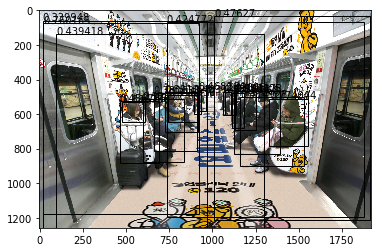

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
    
img = imread('1.jpeg') # 이미지 읽어오기
fig,ax = plt.subplots(1)
ax.imshow(img)
size_y = len(img)
size_x = len(img[0])
print(size_x)
import matplotlib.patches as patches
for i in range(len(axes)):
    rect = patches.Rectangle((axes[i][1] * size_x, axes[i][0] *size_y),size_x  * (axes[i][3]-axes[i][1]), size_y * (axes[i][2]-axes[i][0]),fill=False)
    ax.add_patch(rect)
    plt.text(axes[i][1] * size_x, axes[i][0] *size_y,response.json()['predictions'][0]['detection_scores'][i])
plt.show()

In [7]:
import cv2

 

# color 설정

blue_color = (255, 0, 0)

green_color = (0, 255, 0)

red_color = (0, 0, 255)

white_color = (255, 255, 255)

#font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
font = cv2.FONT_HERSHEY_SIMPLEX

# 모두 0으로 되어 있는 빈 Canvas(검정색)
img = cv2.imread("1.jpeg", cv2.IMREAD_UNCHANGED)
for i in range(len(axes)):
    img = cv2.rectangle(img, (int(axes[i][1] * size_x), int(axes[i][0] *size_y)), (int(axes[i][3]*size_x), int(axes[i][2]*size_y)), (0,255,0), 2)
    cv2.putText(img,response.json()['predictions'][0]['detection_scores'][i],(int(axes[i][1] * size_x), int(axes[i][0] *size_y)), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

SystemError: <built-in function putText> returned NULL without setting an error